In [1]:
from PIL import Image
import requests
from io import BytesIO

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [3]:
img_urls = ['https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png', 
            'https://cims.nyu.edu/~cfgranda/foto.jpg', 
           'https://www.gramcoschoolsupplies.com/pub/media/catalog/product/cache/image/1000x1320/e9c3970ab036de70892d86c6d221abfe/9/3/93622.jpg',
           'https://www.realmenrealstyle.com/wp-content/uploads/stripes.jpg']

In [4]:
img_array = []

for url in img_urls:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.convert('L')
#     img = img.resize((100, 100))
    img = np.array(img)/255.
    img_array.append(img)

In [5]:
def visualize_conv(img_array, filter):
    conv_array = [ ndimage.convolve(img, filter.T,  mode='constant', cval=0.0) for img in img_array]
    
    fig, ax = plt.subplots(nrows=2, ncols= len(img_array), figsize = ( 4 * len(img_array), 8))
    
    for i in range(len(img_array)):
        ax[0, i].imshow(img_array[i], cmap='gray')
        ax[1, i].imshow( np.clip( conv_array[i], 0., 1.), cmap='gray')
        ax[0, i].set_xticks([])
        ax[0, i].set_yticks([])
        ax[1, i].set_xticks([])
        ax[1, i].set_yticks([])
    
    plt.show()

In [6]:
filter_array = [ np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ]),
                 np.array([ [1, 0, -1], [1, 0, -1], [1, 0, -1] ]), 
                 np.array( [ [1, 1, 1], [0, 0, 0], [-1, -1, -1]]), 
                 np.array( [ [-1, 0, 1], [0, 0, 0], [1, 0, -1]]), 
                 np.array( [ [0, -1, 0], [-1, 4, -1], [0, -1, -0]]), 
                 np.array( [ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
                 np.array([ [1, 0, -1], [1, 1, -1], [1, 0, -1] ]), 
                 np.array( [ [1, 1, 1], [0, 1, 0], [-1, -1, -1]]), 
                 np.array( [ [-1, 0, 1], [0, 1, 0], [1, 0, -1]]), 
                 np.array( [ [0, -1, 0], [-1, 5, -1], [0, -1, 0]]), 
                 np.array( [ [-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]),
                 (1/9.) * np.ones([3, 3]), 
                 (1/16.) * np.array([ [1, 2, 1], [2, 4, 2], [1, 2, 1] ])]

Filter 1 : 
[[0 0 0]
 [0 1 0]
 [0 0 0]]


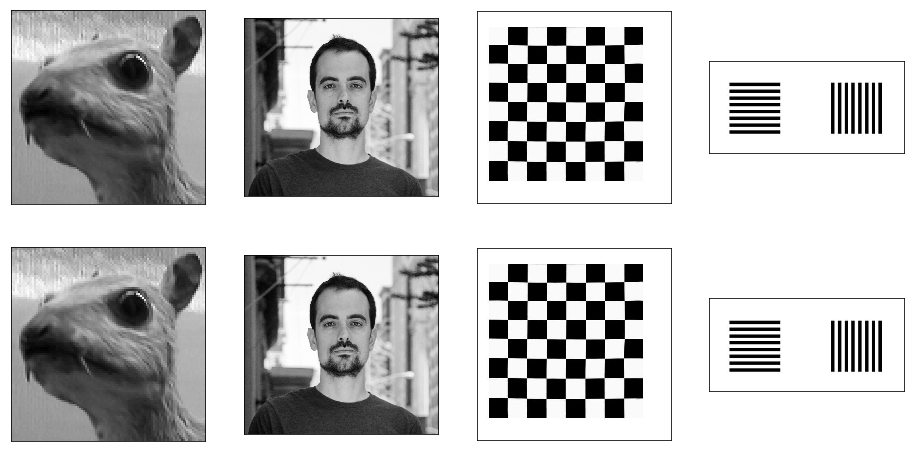



Filter 2 : 
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


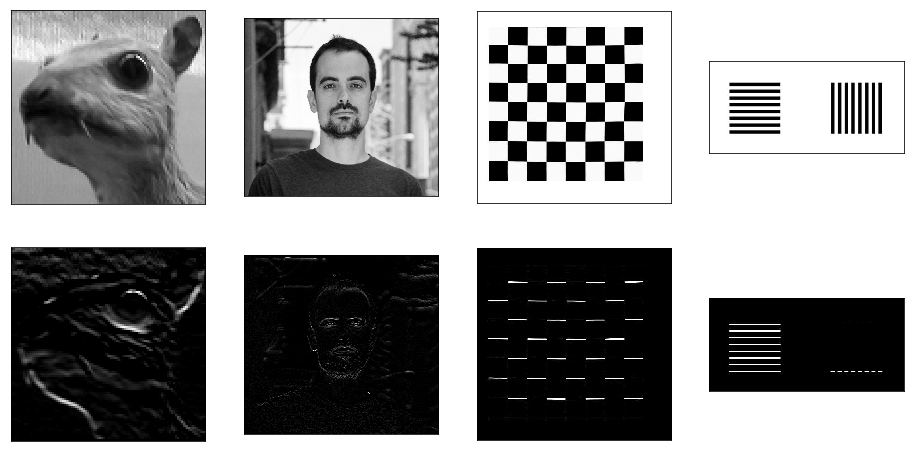



Filter 3 : 
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


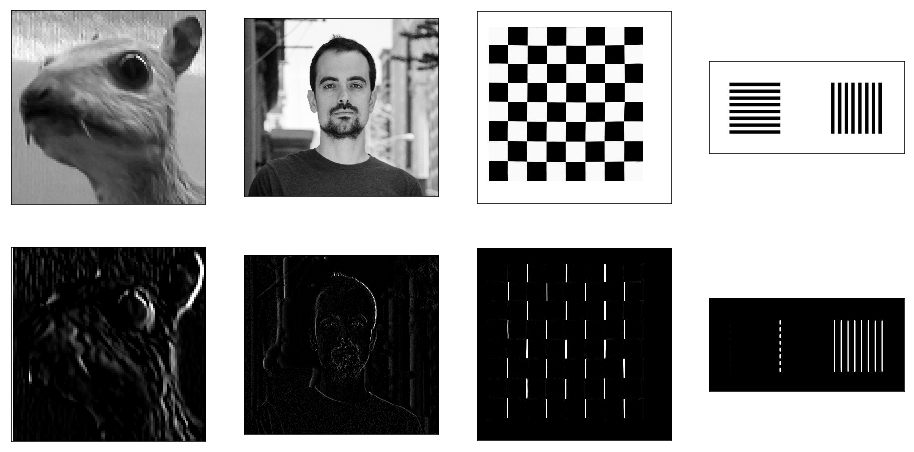



Filter 4 : 
[[-1  0  1]
 [ 0  0  0]
 [ 1  0 -1]]


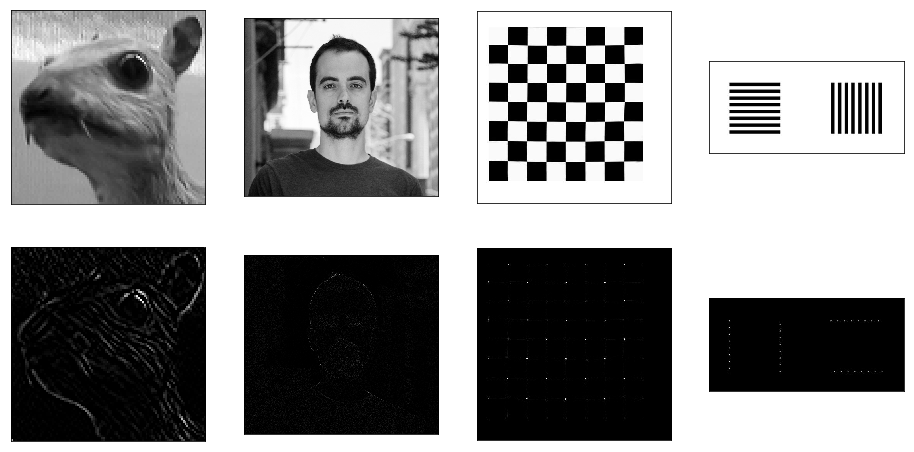



Filter 5 : 
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


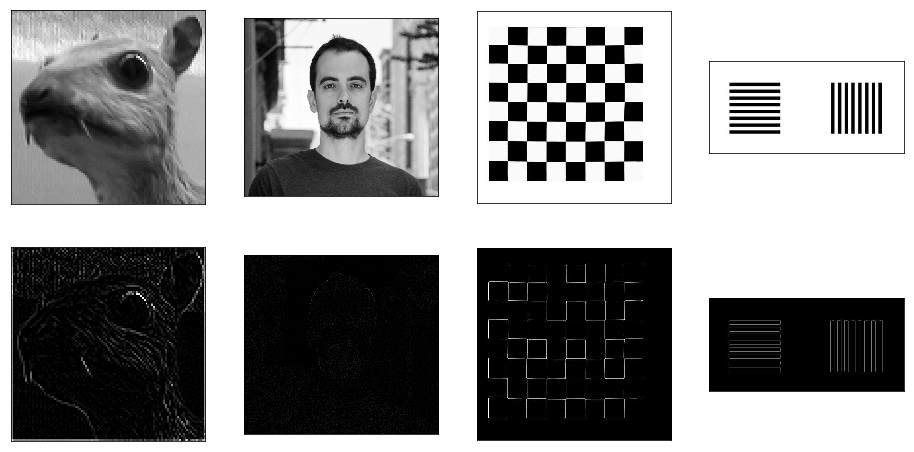



Filter 6 : 
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


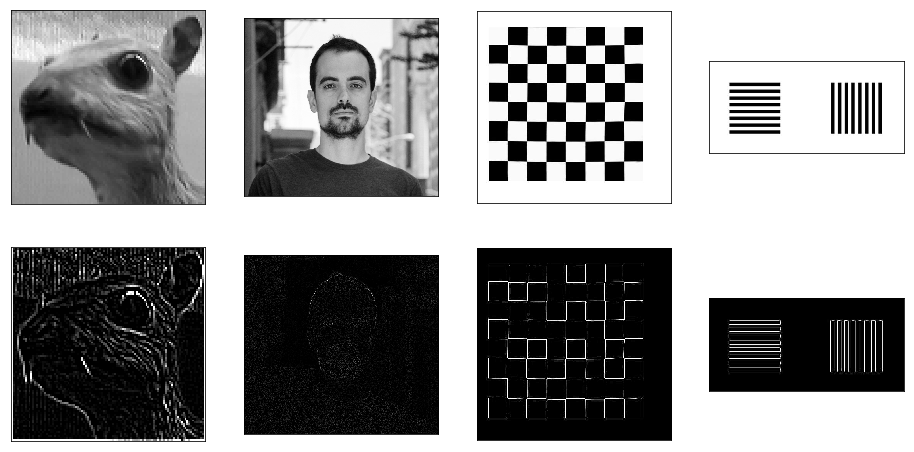



Filter 7 : 
[[ 1  0 -1]
 [ 1  1 -1]
 [ 1  0 -1]]


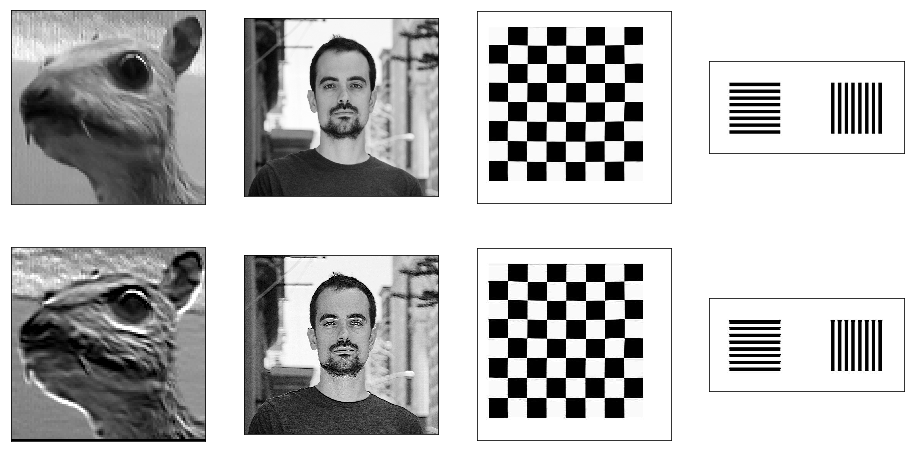



Filter 8 : 
[[ 1  1  1]
 [ 0  1  0]
 [-1 -1 -1]]


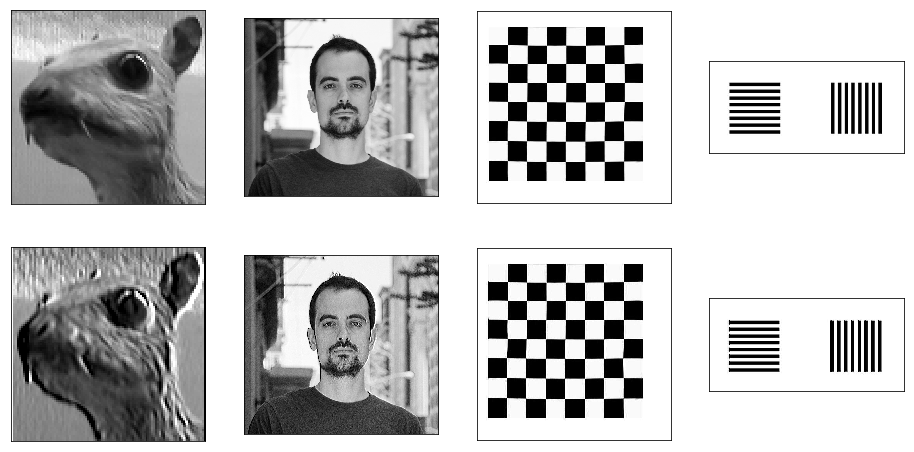



Filter 9 : 
[[-1  0  1]
 [ 0  1  0]
 [ 1  0 -1]]


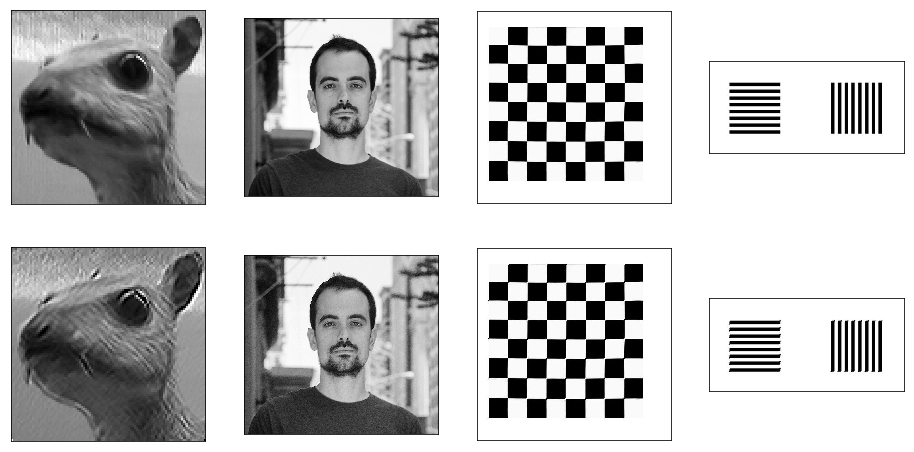



Filter 10 : 
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


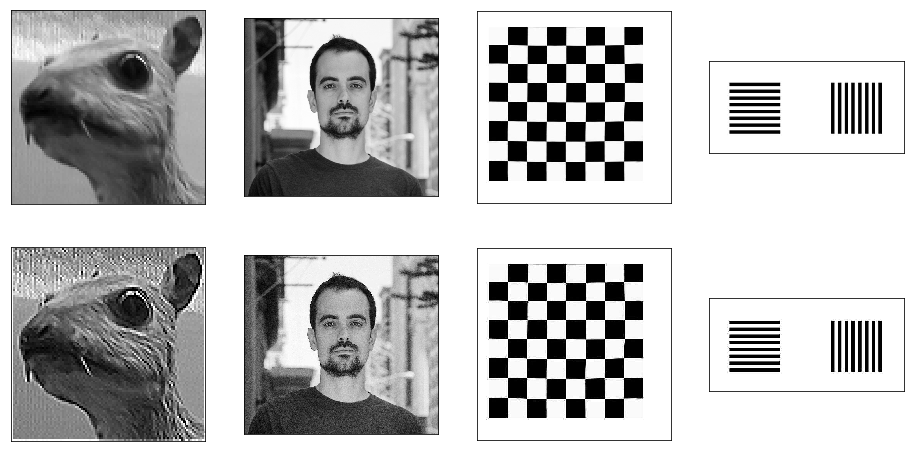



Filter 11 : 
[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


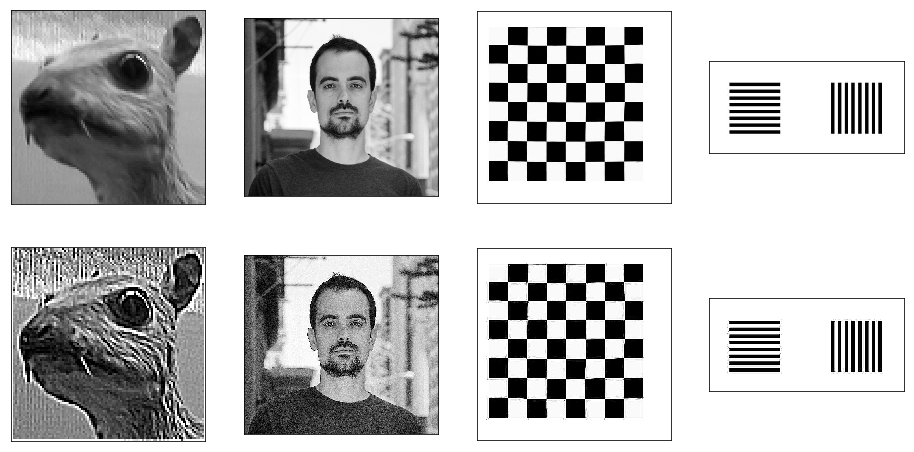



Filter 12 : 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


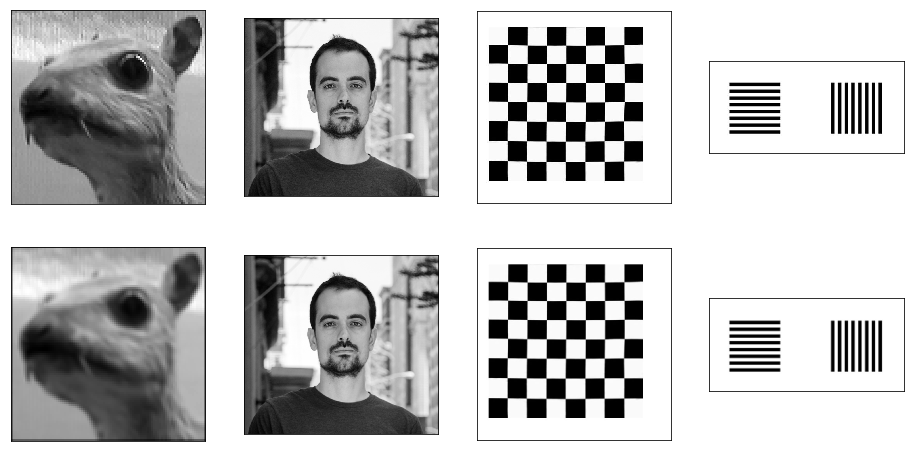



Filter 13 : 
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


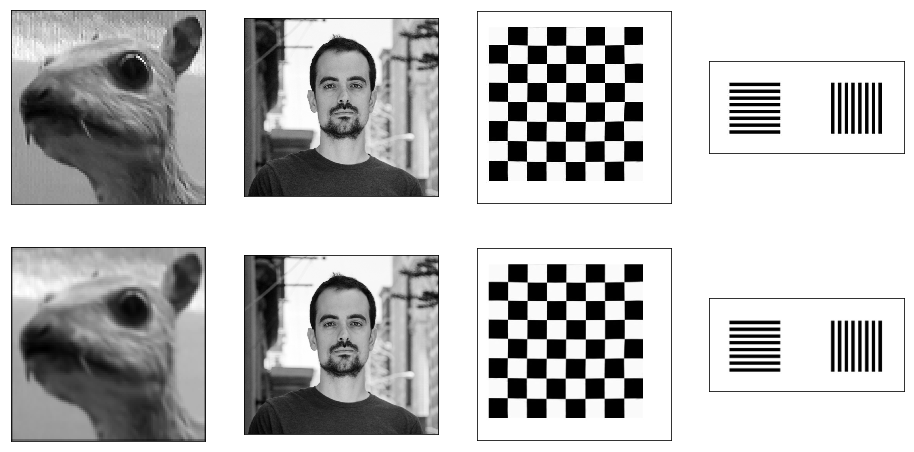

In [7]:
for i, filter in enumerate(filter_array):
    print('Filter {} : \n{}'.format(i+1, filter))
    visualize_conv(img_array, filter)
    print('='* 20)
    print('\n')